In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
class LogisticRegression:
    def __init__(self, X_train, y_train, alpha=0.01, nb_epochs=50):
        self.y_train = y_train
        self.alpha = alpha
        self.nb_epochs = nb_epochs
        self.dim = X_train.shape[1]
        self.X_train = np.ones((X_train.shape[0], self.dim + 1))
        self.X_train[:, 1:] = X_train
        self.theta = np.random.random((self.dim + 1, 1))
        self.loss_history = []
    
    def logit(self, x):
        return self.sigmoid(x.dot(self.theta))
    
    def sigmoid(self, z):
        return 1.0/(1.0 + np.exp(-1.0 * z))
    
    def compute_loss(self):
        n = self.X_train.shape[0]
        loss = 0.0
        for ix in range(n):
            hx = self.logit(self.X_train[ix])
            error = self.y_train[ix]*np.log(hx + 1e-03) + (1 - self.y_train[ix])*np.log(1 - hx + 1e-03)
            loss += -1.0 * error
        return loss
    
    def compute_grads(self):
        n = self.X_train.shape[0]
        grads = np.zeros(self.theta.shape)
        for ix in range(n):
            gr = -1.0 * (self.y_train[ix] - self.logit(self.X_train[ix]))*self.X_train[ix]
            grads += gr.reshape(self.theta.shape)
        return grads/n
    
    def update_weights(self, alpha=None):
        if alpha == None:
            alpha = self.alpha
        grads = self.compute_grads()
        theta = self.theta - alpha*grads
        self.theta = theta
    
    def predict(self, x_test):
        x_vector = np.ones((1, x_test.shape[0] + 1))
        x_vector[:, 1:] = x_test
        hx = self.logit(x_vector)
        if hx < 0.5:
            return 0
        else:
            return 1
    
    def train(self, nb_epochs=None, record_loss=False):
        if nb_epochs == None:
            nb_epochs = self.nb_epochs
        for ex in range(nb_epochs):
            if record_loss:
                self.loss_history.append(self.compute_loss())
            self.update_weights()

(500, 2) [ 0.20338626  1.47577296]
(500,) 0.5


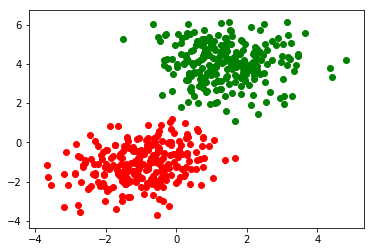

In [6]:
#Generating 2 clusters of data to apply Logistic Regression to

mean_01 = np.array([1.5, 4.0])
mean_02 = np.array([-1.0, -1.0])

cov_01 = np.array([[1.0, 0.0], [0.0, 1.0]])
cov_02 = np.array([[0.9, 0.3], [0.3, 0.9]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 250)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 250)

data = np.zeros((dist_01.shape[0] + dist_02.shape[0], dist_01.shape[1]))
data[:dist_01.shape[0]] = dist_01
data[dist_01.shape[0]:] = dist_02

print data.shape, data.mean(axis=0)

labels = np.zeros((data.shape[0],))
labels[:dist_01.shape[0]] = 1

print labels.shape, labels.mean()

plt.figure(0)
for ix in range(data.shape[0]):
    if labels[ix] == 0:
        plt.scatter(data[ix, 0], data[ix, 1], color='red')
    else:
        plt.scatter(data[ix, 0], data[ix, 1], color='green')
plt.show()

In [8]:
all_data = np.zeros((data.shape[0], data.shape[1] + 1))
all_data[:, :data.shape[1]] = data
all_data[:, -1] = labels
np.random.shuffle(all_data)

split = int(0.8*all_data.shape[0])
data_train = all_data[:split, :-1]
data_test = all_data[split:, :-1]
labels_train = all_data[:split, -1]
labels_test = all_data[split:, -1]

In [9]:
lr = LogisticRegression(X_train=data_train, y_train=labels_train, alpha=0.5, nb_epochs=200)
print lr.X_train.shape
print lr.nb_epochs
print lr.theta.shape
lr.train(record_loss=True)

(400, 3)
200
(3, 1)


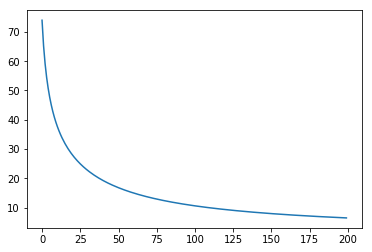

[[-2.42799433]
 [ 1.18343867]
 [ 2.01883569]]


In [12]:
plt.figure(0)
plt.plot(lr.loss_history)
plt.show()
print lr.theta

In [13]:
preds = []
for ix in range(data_test.shape[0]):
    preds.append(lr.predict(data_test[ix]))

count = 0
for ix in range(labels_test.shape[0]):
    if preds[ix] == labels_test[ix]:
        count += 1
print "Accuracy:", float(count*100)/labels_test.shape[0]

Accuracy: 100.0


In [ ]:
'''
Implementing Logistic Regression on Breast Cancer data available in sklearn
'''

In [21]:
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

In [15]:
ds = load_breast_cancer()
X = ds.data
y = ds.target
X = (X - X.mean(axis=0))/X.std(axis=0)        #normalization

In [18]:
split = int(0.8*X.shape[0])
X_tr = X[:split]
X_te = X[split:]
y_tr = y[:split]
y_te = y[split:]

In [19]:
lr = LogisticRegression(X_train=X_tr, y_train=y_tr, alpha=0.1, nb_epochs=200)
lr.train(record_loss=True)

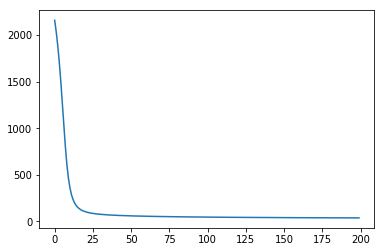

In [20]:
plt.figure(0)
plt.plot(lr.loss_history)
plt.show()

In [22]:
counts_train = 0
for ix in range(X_tr.shape[0]):
    pred = lr.predict(X_tr[ix])
    if pred == y_tr[ix]:
        counts_train += 1

counts_test = 0
for ix in range(y_te.shape[0]):
    pred = lr.predict(X_te[ix])
    if pred == y_te[ix]:
        counts_test += 1
        
print "Accuracy Training:", float(counts_train*100)/y_tr.shape[0]
print "Accuracy Testing:", float(counts_test*100)/y_te.shape[0]

Accuracy Training: 97.3626373626
Accuracy Testing: 96.4912280702
